# Legge dei grandi numeri e probabilità frequentista

## Legge dei grandi numeri

La legge dei grandi numeri è facile da intuire e ancora più facile da comprendere con simulazioni al calcolatore. Di seguito la dimostreremo con un esempio.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

La media di una sequenza molto grande di numeri casuali "tende" ad un valore fisso, che non è più casuale, al crescere della dimensione della sequenza.

Simuliamo l'estrazione di un dado con 6 facce con la funzione ```random.randint(1,6)```

In [2]:
r = random.randint(1,6)
print(r)

4


Generiamo un numero alto di lanci

In [3]:
n = 10000
d1 = np.array([random.randint(1,6) for i in range(n)])
d2 = np.array([random.randint(1,6) for i in range(n)])

In [4]:
#print(list(d1))

Definiamo la *media* di $N$ lanci come:

$\bar{x}_N = \frac{\displaystyle 1}{\displaystyle N} {\displaystyle \sum_{i=1}^N x_i}$

Calcoliamo la *media* dei primi $N$ lanci per ogni $N$ fino ad un certo valore abbastanza grande. A scopo dimostrativo, genereremo due sequenze casuali diverse.

In [5]:
avg1 = [d1[:i+1].mean() for i in range(n)]
avg2 = [d2[:i+1].mean() for i in range(n)]

Mostriamo in un grafico come cambia $\bar{x}$ al variare di $N$.

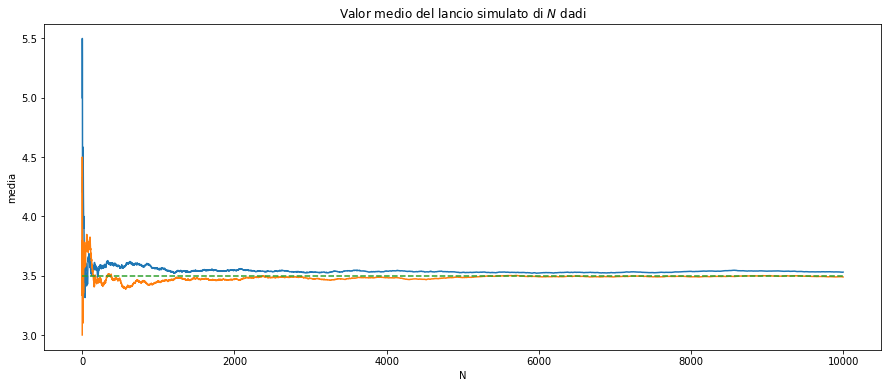

In [7]:
plt.figure(figsize=(15,6))
x = list(range(n))
plt.plot(x,avg1)
plt.plot(x,avg2)
plt.plot([0,n],[3.5,3.5], linestyle='--')
plt.title('Valor medio del lancio simulato di $N$ dadi')
plt.xlabel('N')
plt.ylabel('media')
plt.show()

Aumentando il numero di conteggi $N$ è evidente visivamente dal grafico che la frequenza, al cerscere di $N$, si avvicina al *valore atteso* di $x$ dalla definizione di probabilità classica:

$\displaystyle \mathbb{E}[x] =\sum_{x=1}^6 x\, P(x) = \sum_{x=1}^6 x\cdot\frac{1}{6} = \frac{1+\cdots +6}{6}=3.5$

Avevamo già dimostrato che la varianza di $\bar{x}_N$ è pari a $\sigma^2/N$, dove $\sigma^2$ è la varianza di tutti gli $x_i$. Ci aspettiamo quindi una *dispersione* della distribuzione di $\bar{x}_kN$ sempre minore, man mano che $N$ aumenta.

Si può dimostrare questa proprietà partendo dagli assomi di Kolmogorov, se assumiamo che sia vero un certo modello di probabilità (es.: in questo caso del lancio di dati la probabilità classica), ma la dimostrazione è omessa in questi esempi. 

In [7]:
np.array(range(1,7)).mean()

3.5

## Formulazione della legge dei grandi numeri

La formulazione matematica della legge dei grandi numeri può essere fatta come segue.

$\displaystyle \forall\varepsilon\,\,\,\,\lim_{N\rightarrow\infty}P(|\bar{x}_N-\mathbb{E}[x]|<\varepsilon) = 1$

Ossia, la media del campione di dimensione $N$ *converge in probabilità* al valore atteso $\mathbb{E}[{x}]$.

## Dalla legge dei grandi numeri alla probabilità come limite della frequenza

Se si considera la media di $N$ variabili bernoulliane, il cui esito può essere 0 o 1, la media rappresenta la frazione di casi positivi:

$\displaystyle\bar{x}_N = \frac{n}{N}$

Sarebbe anche a dire, la frazione $f_N$ di una variabile binomiale $n$ rispetto al numero totale di casi $N$.

Secondo la legge dei grandi numeri, $f_N$ tende a $p$ per $N\rightarrow\infty$.

Questo permette di interpretare la probabilità come limite della frequenza per grandi numeri di tentativi.

## Probabilità frequentista

La legge dei grandi numeri si può:
* o dimostrare a partire da una teoria della probabilità che si assume vera,
* oppure si può considerare una legge empirica valida per le osservazioni di esperimenti ripetibili.

In questa seconda accezione viene usata come base della formulazione della probabilità intesa in senso *frequentista*.

Più in generale, però, se usiamo la convergenza in probabilità per definire una probabilità, abbiamo un problema di dipendenza "circolare" del ragionamento.

### Definizione

La probabilità frequentista è definita come limite della frequenza di un evento al tendere del numero di osservazioni all'infinito. Il limite è chiaramente inteso solo in senso ideale e ha difficoltà concettuali ad essere definito matematicamente in modo rigoroso. La "dimostrazione" con il calcolatore, più che con dispositivi fisici, inevitabilmente più lenti, esemplifica cosa si intende più facilmente di ogni tentativo di dimostrazione matematica.

Se si ha una forma di probabilità che precede la definizione di probabilità in senso frequentista, questa si può dimostrare come un teorema. Altrimenti la definizione di una probabilità in termini di un'altra probabilità presenta aspetti tautologigi.

## Simulazione con numeri pseudocasuali

Simuliamo l'estrazione di un dado con 6 facce con la funzione ```random.randint(1,6)```

In [9]:
r = random.randint(1,6)
print(r)

6


Generiamo un numero alto di lanci

In [10]:
n = 100000
d = np.empty(n)
for i in range(n): d[i] = random.randint(1,6)
#print(d)

Calcoliamo la probabilità di ciascun risultato da 1 a 6

In [11]:
count = np.empty(6)
for i in range(6): count[i] = len(np.where(d==i+1)[0])
freq = count/n
print("Conteggi: ", count)
print("Frequenza:", freq)

Conteggi:  [16490. 16896. 16427. 16712. 16798. 16677.]
Frequenza: [0.1649  0.16896 0.16427 0.16712 0.16798 0.16677]


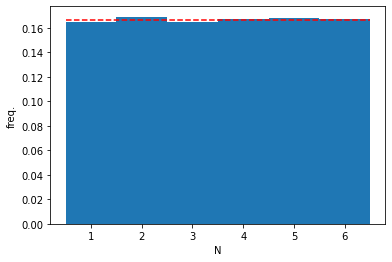

In [12]:
plt.figure()
x=np.arange(1,7)
plt.bar(x, freq, 1)
plt.plot([0.5, 6.5], [1/6, 1/6], color='red',linestyle='--')
plt.xlabel('N')
plt.ylabel('freq.')
plt.show()

Aumentando il numero di conteggi $N$ è evidente che la frequenza, al cerscere di $N$, si avvicina al valore atteso dalla definizione di probabilità classica, $p = 1/6$. Il limite esatto non è reggiungible in realtà, se non attendendo un tempo infinito.

In sostanza, la probabilità frequentista definisce come probabilità il limite per $M\rightarrow\infty$ della frequenza, in analogia a quanto si può dimostrare nei casi trattabili attraverso la probabilità classica.

Ci piacerebbe definire:

$\displaystyle P(x) = \lim_{n\rightarrow\infty} \frac{N_n(x)}{N}$

Tuttavia, non c'è alcuna garanzia che la successione converga. Nulla impedisce, infatti, di osservare una sequenza arbitrariamente lunga di $6,6,6,6,\cdots$. Semplicemente, ripetendo tante volte l'esperimento, quest accadrà *molto di rado*. Ma possiamo affermare che ciò è *improbabile* solo dopo aver definito cosa significa probabilità, e noi stiamo in qualche modo usando il concetto di probabilità *prima* di definirlo.

La definizione della probabilità frequentista è:

$\displaystyle P(E) = p\,\,\,\mathrm{se}\,\,\, \forall\varepsilon\,\,\,\lim_{n\rightarrow\infty}
P\left(
\left|\frac{N_n(E)}{N}-p\,
\right|<\varepsilon
\right)=1$

La principale difficoltà nell'accetazione empirica della regola è che il limite per $N\rightarrow\infty$ non è realizzabile, oltre al fatto, come già notato, che il passaggio al limite in probabilità, per definire a sua volta una probabilità, presenza delle inconsistenze logiche.

Tuttavia, i fisici, più degli statistici, spesso usano questo concetto in maniera pragmatica, senza troppa attenzione alle inconsistenze concettuali di questa definizione.

"*this definition is not very appealing to a mathematician, since it is based on experimentation, and, in fact, implies unrealizable experiments*"

Eadie, W., Drijard, D., James, F., Roos, M., Saudolet, B.: Statistical Methods in Experimental Physics. North Holland, Amsterdam (1971)

## Successione logistica

Rivediamo l'esempio della successione logistica per $r=4$ alla luce della legge dei grandi numeri e forniamo un'interpretazione frequentista della relativa probabilità.

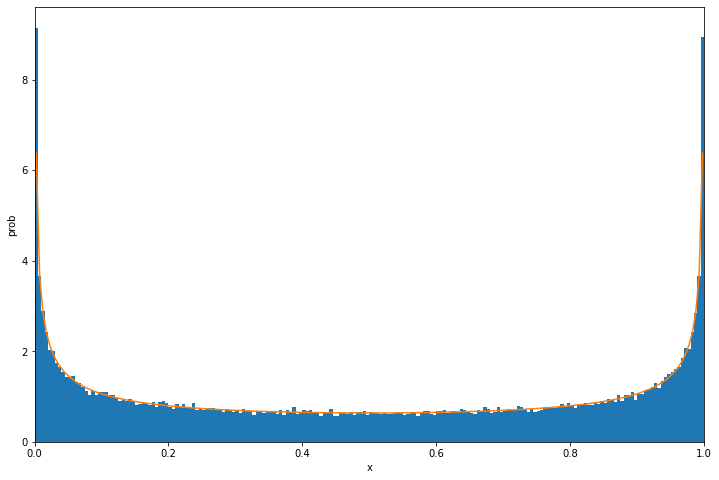

In [13]:
seq=[]
r=4
x = 0.34567
for i in range(100000):
    seq.append(x)
    x=r*x*(1-x)
nbins=200
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(seq, nbins, density=True)
delta=1/nbins
x = np.linspace(0+delta/2,1-delta/2,nbins)
y = c = 1./np.sqrt(x*(1-x))
y/=math.pi
plt.plot(x, y)
plt.xlim(0, 1)
plt.xlabel('x')
plt.ylabel('prob')
plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


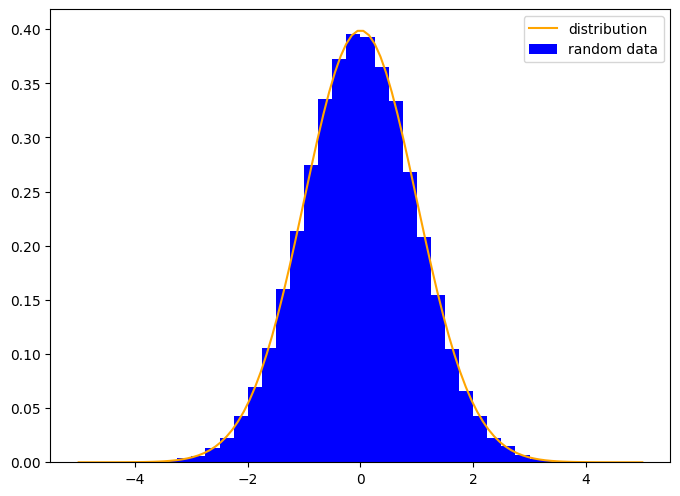

In [15]:
from scipy.stats import norm
n_rnd = 50000
r =  np.random.normal(loc=0.0, scale=1.0, size=n_rnd)
x = np.linspace(-5, 5, 100);
y = norm.pdf(x)
j = 0
for i in range(1, n_rnd+1, 100):
    if (i - 1) % 1000 == 0: print(i - 1)
    fig = plt.figure(figsize=(8,6), dpi=100)
    plt.hist(r[:i], bins=80, range=[-5,5], density=True, color='b', label='random data')
    plt.plot(x, y, color='orange', label='distribution')
    plt.legend(loc='upper right')
    plt.title("n = {:d}".format(i - 1))
    plt.savefig('img_out/large-numbers-{:d}.png'.format(j))
    j += 1
    plt.close(fig)
fig2 = plt.figure(figsize=(8,6), dpi=100)
plt.hist(r, bins=40, range=[-5,5], density=True, color='b', label='random data')
plt.plot(x, y, color='orange', label='distribution')
plt.legend(loc='upper right')

In [16]:
import imageio
with imageio.get_writer('img_out/large-numbers.gif', mode='I', fps=30) as writer:
    for filename in ['img_out/large-numbers-{:d}.png'.format(i) for i in range(j)]:
        image = imageio.imread(filename)
        writer.append_data(image)

<img src="img_out/large-numbers.gif" width="750" align="center">

# Campi di applicazione

L'approccio frequentista si può applicare unicamente ai casi in cui la variabile casuale è il risultato di un esperimento ripetibile. Si applica bene, quindi, in molti campi scientifici sperimentali. Non si può applicare, tuttavia, a casi in cui si voglia stabilire la probabilità di un'affermazione di cui non è noto se sia vero o falso. 

Vista la necessità di ripetere l'esperimento nelle **identiche condizioni**, nelle applicazioni reali bisogna porre particolare attenzione.

Esempi in cui **non** si può applicare la probabilità in senso ferquentista sono:
* Probabilità che domani piova a Ginevra
* Probabilità che il Napoli vinca la prossima partita di campionato
* Probabilità che i dinosauri siano stati estinti da un asteroide
* Probabilità che la materia oscura sia fatta da particelle con massa > 1 TeV
* Probabilità che il Sars-Cov-2 sia stato prodotto artificialmente dall'uomo
* Probabilità che la Terra sia piatta

Tutte queste affermazioni possono vedere associata una probabilità nell'**approccio bayesiano** che vedremo successivamente.